Iota Calculation, Fourier Surface Extraction, and Perturbations (Wendelstein 7-X)
=================================================================================

This example shows how to calculate the rotational transform for Wendelstein 7-X. 

In [1]:
import fusionsc as fsc
from fusionsc.devices import w7x
import numpy as np
import matplotlib.pyplot as plt

First, we need to perform some setup to make sure W7-X data are available.

Note: The W7-X geometry is currently protected by the W7-X data access agreement. Therefore, the file referenced below is available to W7-X team members (including external collaborators who signed this agreement) upon request.

In [2]:
fsc.resolve.importOfflineData('../../w7x-op21.fsc')

Now we need to setup the geometry and magnetic field configuration. To speed up the magnetic field calculation, we use a slightly coarser grid.

In [3]:
field = w7x.standard()

grid = w7x.defaultGrid()
grid.nR = 32
grid.nZ = 32
grid.nPhi = 32

field = field.compute(grid).cache("surfField.fsc")
await field

Finally, we need to decide in which phi planes we want to evaluate our iota and start our surfaces from.

In [5]:
xStart = np.linspace(5.65, 6.3, 30)
yStart = 0 * xStart
zStart = 0 * xStart

Now it's time to run our calculation.

In [5]:
iotas = fsc.flt.calculateIota(
    field, [xStart, yStart, zStart],
    200, # Turn count
    unwrapEvery = 10, distanceLimit = 1e4, 
    targetError = 1e-3, minStepSize = 1e-3
)

The iota profile is returned in a shape matching the start point shape, and can be easily plotted.

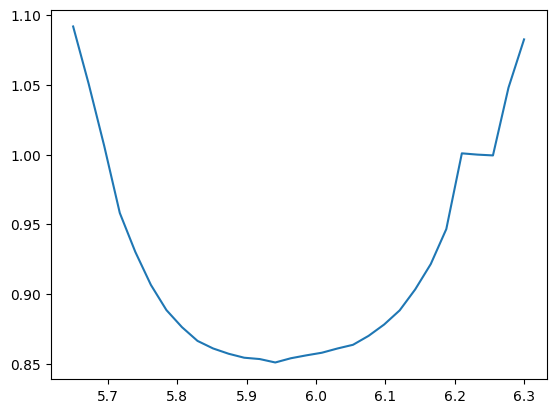

In [6]:
plt.plot(xStart, iotas)

Additionally, the field line tracer can also extract the Fourier decomposition of the magnetic surfaces from the field line. 

In [80]:
modes = fsc.flt.calculateFourierModes(
    field, [xStart, yStart, zStart],
    30, # Turn count
    nMax = 5, mMax = 7, toroidalSymmetry = 5,
    unwrapEvery = 10, recordEvery = 1,
    targetError = 1e-3, distanceLimit = 1e5, maxStepSize = 0.01,
    stellaratorSymmetric = True, aliasThreshold = 0.05
)

The modes are returned with a dict containing rotational transform and the Fourier expansion of the modes, as well as an encoding of the result as a FourierSurfaces object that can also be used in VMEC inputs.

In [6]:
modes.keys()

dict_keys(['surfaces', 'iota', 'theta', 'rCos', 'zSin', 'mPol', 'nTor'])

Of particular interest are two components: The first one is the 'iota' array, which returns the rotational transforms.

In [7]:
modes["iota"]

array([1.09444021, 1.05147633, 0.99584491, 0.9590963 , 0.93131329,
       0.90825292, 0.89044472, 0.87708746, 0.86824525, 0.86214925,
       0.85839433, 0.85571463, 0.85474872, 0.85227694, 0.854434  ,
       0.85656028, 0.85808343, 0.86058415, 0.86416049, 0.87002159,
       0.87808519, 0.8886919 , 0.90319517, 0.92180227, 0.9465071 ,
       1.00047059, 1.00011697, 1.00030078, 1.04812043, 1.08246331])

Secondarily relevant is the 'surfaces' element, which contains the magnetic surfaces. This is an instance of the class fusionsc.magnetics.SurfaceArray, which can be sliced, added, and multiplied similar to a regular NumPy array.

In [9]:
modes["theta"]

array([ 3.05499683e+00,  3.06511679e+00, -1.53853968e+00,  3.04789752e+00,
        3.06011133e+00,  3.06951309e+00,  3.09790724e+00,  3.04396081e+00,
        3.05466676e+00,  3.04656444e+00,  3.03134871e+00,  3.04420938e+00,
        2.08799946e+00,  2.15265923e+00, -7.35932886e-01,  5.58303403e-03,
        9.70771550e-03,  1.86229450e-03, -1.10290469e-02,  3.34755947e-03,
        8.34118608e-03, -4.59210820e-03, -1.23285713e-02, -2.30900669e-02,
       -2.34730191e-03, -1.72983632e-01,  2.25624473e-01, -2.43986656e-02,
        4.52786654e-04, -4.80124755e-03])

To plot the modes, we need to multiply the Fourier coefficients with the appropriate angles.

In [82]:
surfaces = modes["surfaces"]

print(type(surfaces))
#print("First:\n", surfaces[0])
#print("Last:\n", surfaces[-1])
#print("Average:\n", (surfaces[0] + surfaces[-1]) / 2)
#for i in range(0, surfaces.shape[0]):
#    print(surfaces[i].data.rCos)
print(surfaces[-4].data.rCos)

<class 'fusionsc.magnetics.SurfaceArray'>
shape: [11, 8]
data: [5.476880400064875, 0.53577153746381545, 0.086167257070756273, 0, 0, 0, 0, 0, 0.24876703804113193, -0.25344980078147678, 0.060435086389045906, 0, 0, 0, 0, 0, -0.0092448214569930964, -0.015347356935070616, 0.082366898480248446, 0, 0, 0, 0, 0, -0.0035084950642083426, 0.0049147018688642527, -0.0018620218509459619, 0, 0, 0, 0, 0, -0.0013348871253378103, 0.0019298282016008107, -0.0013484427825197721, 0, 0, 0, 0, 0, 0.00018728042288860972, 0.00014438647819070509, 0.00047911938569339429, 0, 0, 0, 0, 0, 0, 0.0004307223562607721, -0.0006657845089401757, 0.00026031098998514137, -0.0002146445781512002, -0.00050418404840430354, -0.00068061417494623747, 0.00077431061969340906, 0, -0.00078948921587734333, -0.00016404005604234341, 0, 0, 0, 0, 0, 0, 0.00098511761996553744, 0.0010089547019746055, 0, 0, 0, 0, 0, 0, 0.0099168954380363002, -0.015903625207850932, 0, 0, 0, 0, 0, 0, 0.034890273755331186, -0.0060424732478256008, 0, 0, 0, 0, 0]


(3, 30, 3, 100)


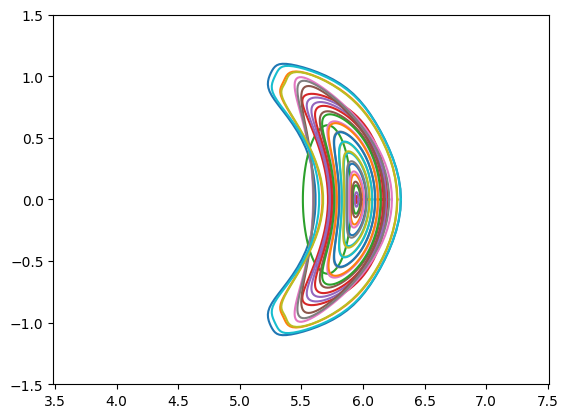

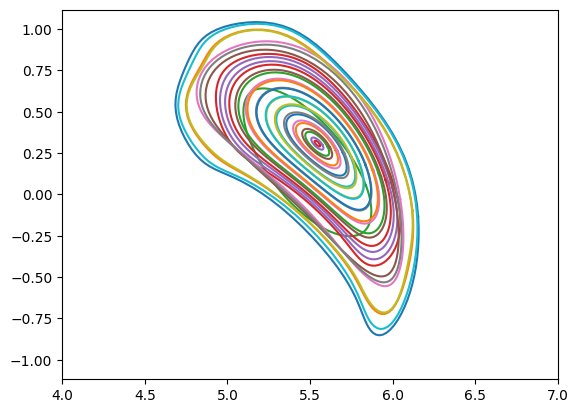

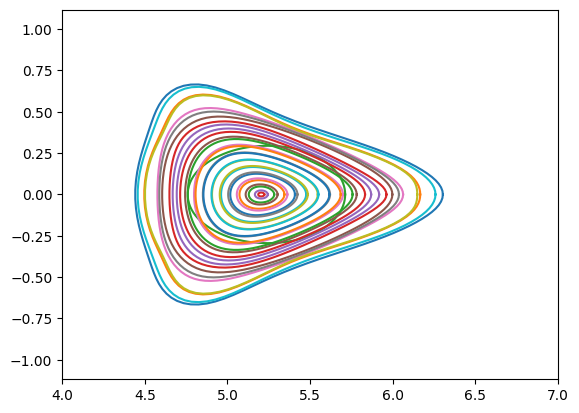

In [83]:
iSurf = 0
thetas = np.linspace(0, 2 * np.pi, 100)
phis = np.linspace(0, 2 * np.pi / 10, 3)

data = surfaces.evaluate(phis, thetas) # Surfaces -5, -4, -3 are rational and failed to reconstruct

print(data['points'].shape)

for iPhi in range(len(phis)):
    plt.figure()
    for iSurf in range(0, surfaces.shape[0]):
        #if abs(modes['iota'][iSurf] - 1) < 0.02:
        #    continue
            
        dp = 1
        x, y, z = data['points'][:,iSurf,iPhi,::dp]
        dx, dy, dz = data['thetaDerivatives'][:,iSurf,iPhi,::dp]
        
        r = np.sqrt(x**2 + y**2)
        
        dr = (dx * x + dy * y) / r
        
        
        plt.plot(r, z)
        #plt.quiver(r, z, dr, dz)
    plt.axis('equal')
    plt.xlim(4, 7)
    plt.ylim(-1.5, 1.5)
plt.show()

The obtained surfaces can also be used to calculate a mode decomposition of the magnetic field

C:\Users\Alexander\AppData\Roaming\Python\Python310\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


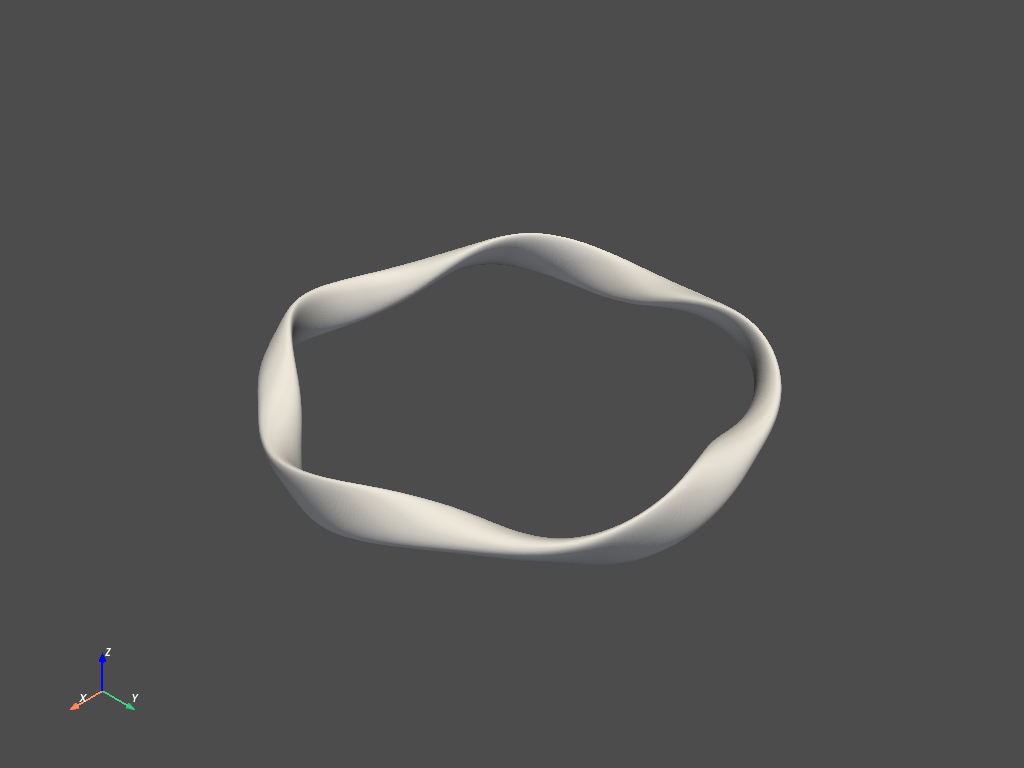

In [84]:
surfaces[2].asGeometry(nPhi = 360, nTheta = 360).asPyvista().plot()

C:\Daten\repos\fsc\src\python\fusionsc\_api_markers.py:15: UserWarning: The function fusionsc.magnetics.MagneticConfig.calculateRadialModes is part of the unstable API. It might change or get removed in the near future. While unlikely, it might also not be compatible across client/server versions.
  warnings.warn(f"The function {f.__module__}.{f.__qualname__} is part of the unstable API. It might change or get removed in the near future. While unlikely, it might also not be compatible across client/server versions.")


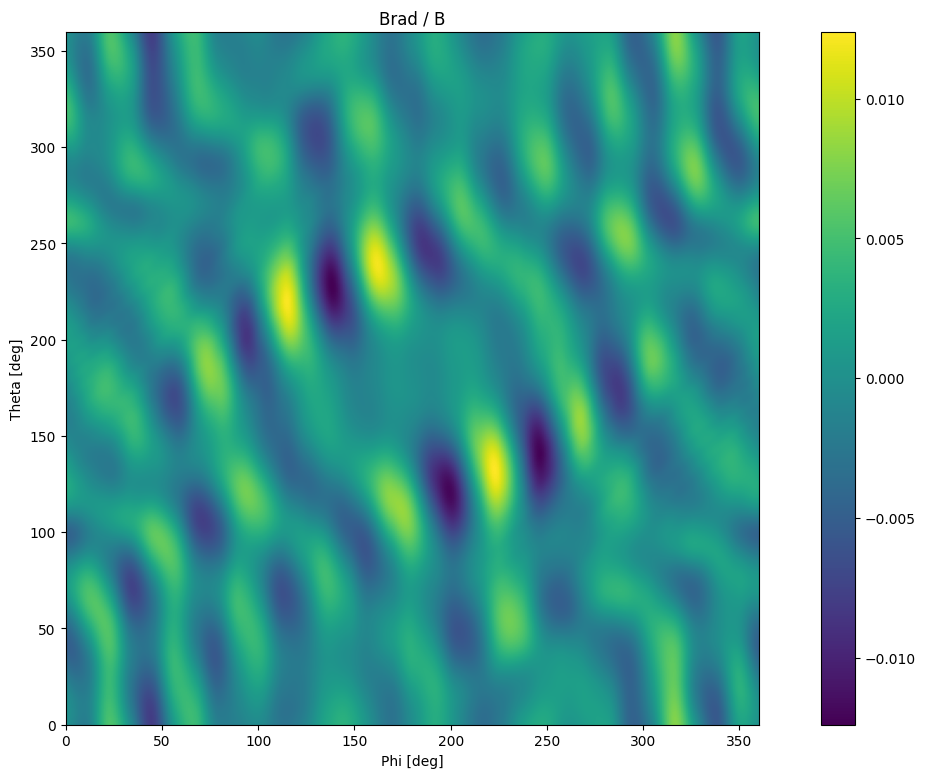

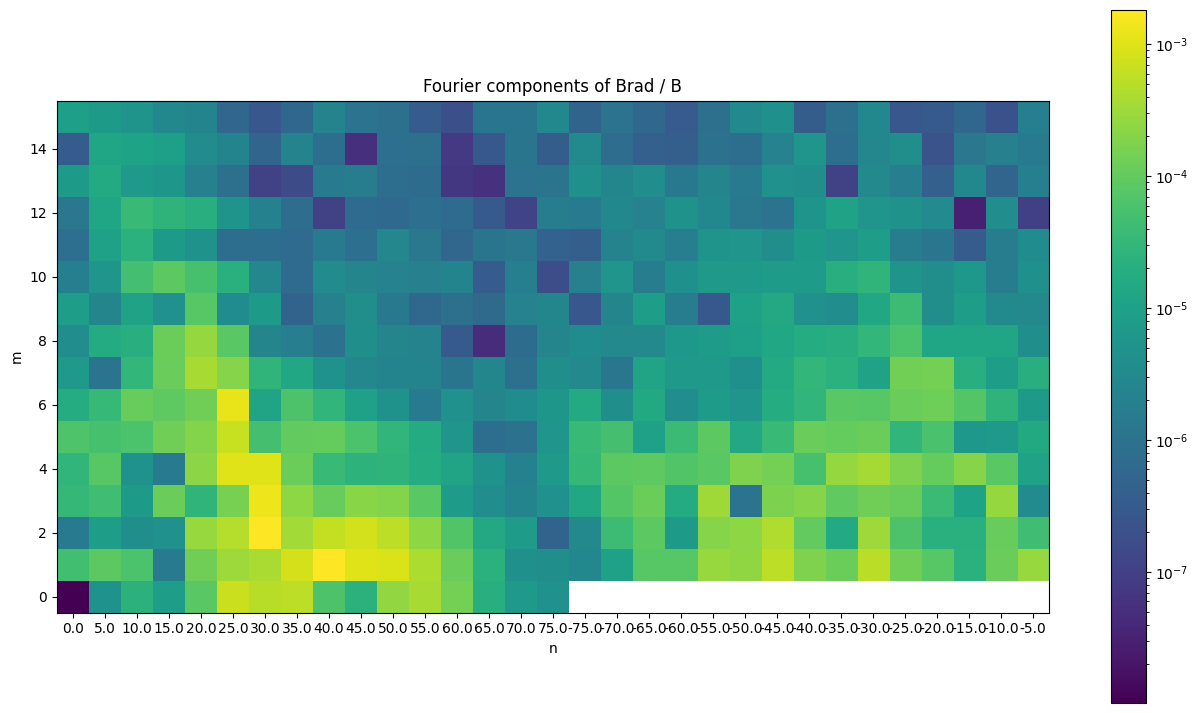

(400, 400)
n = 0, m = 0, val = 1.02e-08
n = 5, m = 0, val = 5.13e-06
n = 10, m = 0, val = 2.46e-05
n = 0, m = 1, val = 4.73e-05
n = 5, m = 1, val = 8.47e-05
n = 10, m = 1, val = 5.85e-05
n = 0, m = 2, val = 1.51e-06
n = 5, m = 2, val = 8.72e-06
n = 10, m = 2, val = 4.20e-06
n = 0, m = 3, val = 3.17e-05
n = 5, m = 3, val = 4.46e-05
n = 10, m = 3, val = 7.38e-06
n = 0, m = 4, val = 2.95e-05
n = 5, m = 4, val = 7.71e-05
n = 10, m = 4, val = 4.86e-06
n = 0, m = 5, val = 6.37e-05
n = 5, m = 5, val = 5.40e-05
n = 10, m = 5, val = 6.06e-05


In [13]:
surf = surfaces[6]
#np.asarray(surf.data.rCos)[0,0] += 0.03

fieldModes = field.calculateRadialModes(surf, field, nSym = 5, mMax = 15, nMax = 15, nTheta = 400, nPhi = 400)
cc = fieldModes["cosCoeffs"]
sc = fieldModes["sinCoeffs"]

m = fieldModes["mPol"]
n = fieldModes["nTor"]

phi = fieldModes["phi"]
theta = fieldModes["theta"]

tot = np.sqrt(cc**2 + sc**2)

plt.figure(figsize=(16,9))
plt.imshow(fieldModes["radialValues"].T, origin='lower', extent = [0, 360, 0, 360])
plt.colorbar()
plt.title("Brad / B")
plt.xlabel('Phi [deg]')
plt.ylabel('Theta [deg]')

plt.figure(figsize=(16,9))
plt.imshow(tot.T, origin = "lower", norm = "log")
#plt.xlabel(f"n[0, {n[1]:.0f} ... {max(n):.0f}, {min(n):.0f}, ..., {n[-1]:.0f}]")
plt.xlabel("n")
plt.ylabel("m")
plt.xticks(range(len(n)), n)
plt.title("Fourier components of Brad / B")
plt.colorbar()
plt.show()

print(fieldModes["radialValues"].shape)
for i_m, mVal in enumerate(m):
    for i_n, nVal in enumerate(n):
        if mVal > 5: continue
        if nVal < 0: continue
        if nVal > 10: continue
        print(f"n = {nVal:.0f}, m = {mVal:.0f}, val = {tot[i_n][i_m]:.2e}")


The calculated surfaces can also be converted into geometries to plot.

C:\Users\Alexander\AppData\Roaming\Python\Python310\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


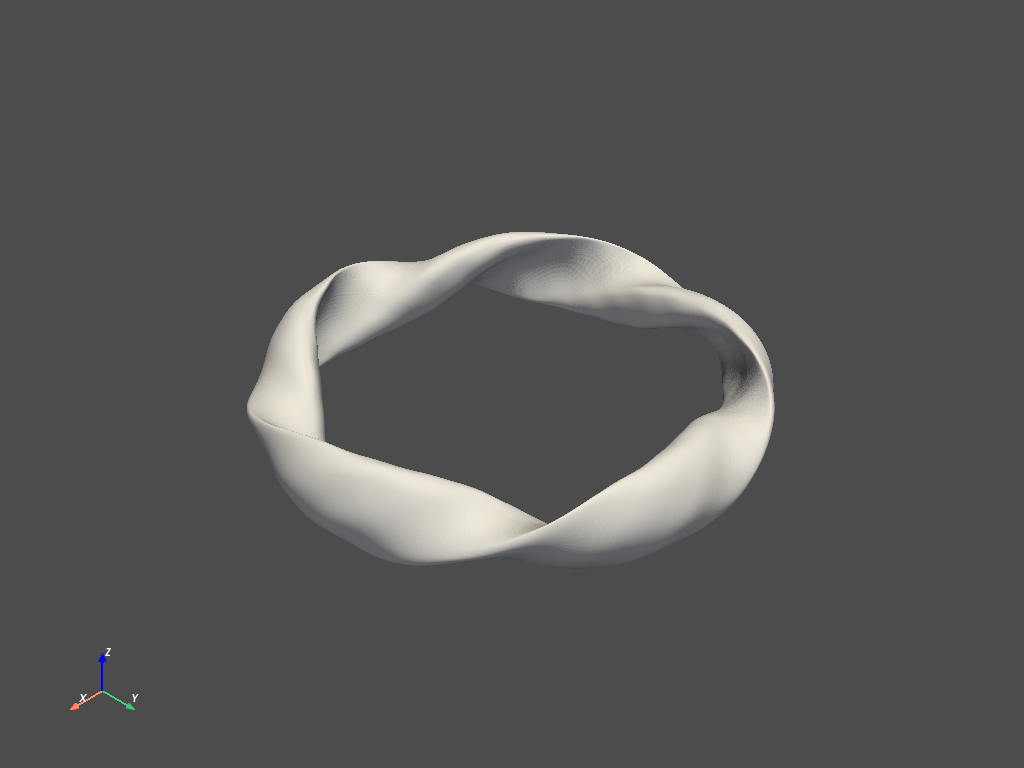

In [20]:
asPv = surfaces[0].asGeometry(nPhi = 360, nTheta = 360).asPyvista()
asPv.plot()